# Exemplos dos carros

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_d583ed9871cd4c0f989be20d8872167e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='0_AaYEdH8KJ1jyQWnOLfm58SslNrzHVIqI3SEjwsmCFs',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_d583ed9871cd4c0f989be20d8872167e.get_object(Bucket='machinelearningespm-donotdelete-pr-pg2kbeziyzzxtg',Key='cars.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

cars = pd.read_csv(body, index_col=False)
cars.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


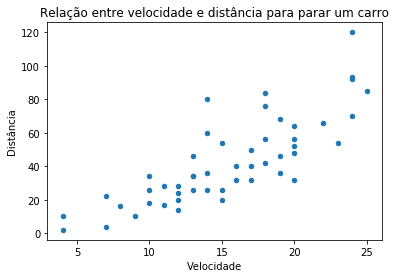

In [4]:
import matplotlib.pyplot as plt
cars.plot(kind='scatter', x='speed', y='dist', style='o')  
plt.title('Relação entre velocidade e distância para parar um carro')  
plt.xlabel('Velocidade')  
plt.ylabel('Distância')  
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(cars['speed'].values.reshape(-1,1), cars['dist'].values.reshape(-1,1))
# este dataset tem apenas uma variavel independente. por isso é necessário fazer o reshape da mesma

In [6]:
# valor de alpha
print(model.intercept_)
#valor de beta
print(model.coef_)

[-17.57909489]
[[3.93240876]]


In [5]:
y = -17.57909 + 3.932408 * x

In [13]:
cars['y_predicted'] = model.predict(cars['speed'].values.reshape(-1,1))

In [15]:
cars

,speed,dist,y_predicted
0,4,2,-1.849460
1,4,10,-1.849460
2,7,4,9.947766
3,7,22,9.947766
4,8,16,13.880175
5,9,10,17.812584
6,10,18,21.744993
7,10,26,21.744993
8,10,34,21.744993
9,11,17,25.677401


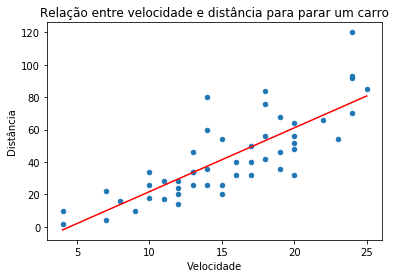

In [16]:
cars.plot(kind='scatter', x='speed', y='dist', style='o')  
plt.title('Relação entre velocidade e distância para parar um carro')  
plt.xlabel('Velocidade')  
plt.ylabel('Distância')  
plt.plot(cars['speed'], y_predicted, color='r')
plt.show()

In [17]:
y_predicted = cars['speed'].apply(lambda x : 42.3 + 0 * x)

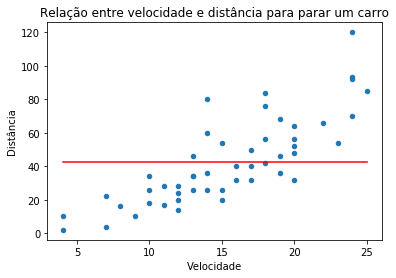

In [18]:
cars.plot(kind='scatter', x='speed', y='dist', style='o')  
plt.title('Relação entre velocidade e distância para parar um carro')  
plt.xlabel('Velocidade')  
plt.ylabel('Distância')  
plt.plot(cars['speed'], y_predicted, color='r')
plt.show()

In [19]:
print(model.intercept_)
print(model.coef_)

[-17.57909489]
[[3.93240876]]


In [20]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = mean_squared_error(cars['dist'], y_predicted)
r2 = r2_score(cars['dist'], y_predicted)

In [21]:
print(rmse)
print(r2)

651.242
-0.0007105324137386404


# Preço de imóveis em Boston

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [2]:
model = LinearRegression().fit(boston['data'], boston['target'])

In [3]:
print(boston['data'].shape)
print(boston['target'].shape)
print(model.intercept_)
print(model.coef_)

(506, 13)
(506,)
36.45948838508987
[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


In [4]:
y_predicted = model.predict(boston['data'])

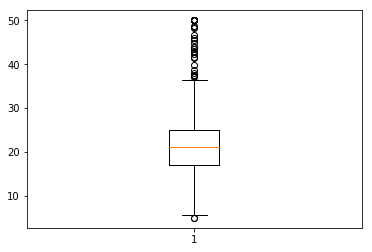

In [9]:
import matplotlib.pyplot as plt
x = plt.boxplot(boston['target'])

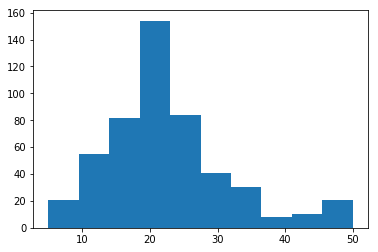

In [15]:
x = plt.hist(boston['target'])

In [13]:
print(min(boston['target']))
print(max(boston['target']))

5.0
50.0


In [28]:
rmse = mean_squared_error(boston['target'], y_predicted)
r2 = r2_score(boston['target'], y_predicted)
print(rmse)
print(r2)
print('Mean Absolute Error:', mean_absolute_error(boston['target'], y_predicted)) 

21.894831181729206
0.7406426641094094
Mean Absolute Error: 3.270862810900314


In [29]:
import numpy as np
df1 = pd.DataFrame(data = np.c_[boston['target'], y_predicted], columns = ['real','predicted'])
df1.head()

,real,predicted
0,24.0,30.003843
1,21.6,25.025562
2,34.7,30.567597
3,33.4,28.607036
4,36.2,27.943524


In [32]:
print('min ', boston['target'].min())
print('max ', boston['target'].max())

min  5.0
max  50.0


## Exemplos didático para regressão linear e polinomial

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
#x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
#y = np.array([25, 20, 14, 32, 22, 38])
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])
print(x)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]


In [7]:
print(y)

[15 11  2  8 25 32]


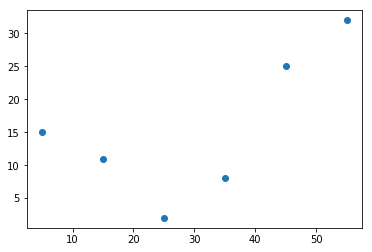

In [8]:
import matplotlib.pyplot as plt
plt.plot(x,y,'o')

In [9]:
model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coeficients:', model.coef_)

coefficient of determination: 0.4065969428801286
intercept: 4.099999999999996
coeficients: [0.38]


In [10]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 6.   9.8 13.6 17.4 21.2 25. ]


In [11]:
y_pred = model.intercept_ + model.coef_ * x
print('predicted response:', y_pred, sep='\n')

predicted response:
[[ 6. ]
 [ 9.8]
 [13.6]
 [17.4]
 [21.2]
 [25. ]]


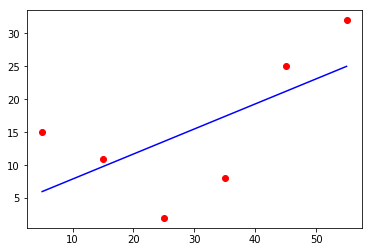

In [12]:
plt.plot(x, y, 'ro')   
plt.plot(x, y_pred, color='b')
plt.show()

In [13]:
#import numpy as np
#from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
#x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
#y = np.array([15, 11, 2, 8, 25, 32])

In [14]:
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(x)
x_ = transformer.transform(x)

In [15]:
print(x_)

[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


In [16]:
model = LinearRegression().fit(x_, y)

In [17]:
r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)

coefficient of determination: 0.8908516262498564
intercept: 21.372321428571425
coefficients: [-1.32357143  0.02839286]


In [18]:
y_pred = model.predict(x_)
print('predicted response:', y_pred, sep='\n')

predicted response:
[15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]


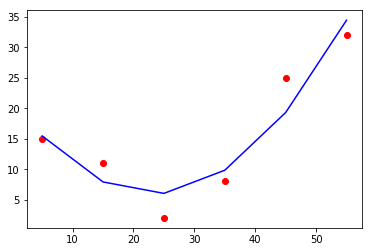

In [19]:
plt.plot(x, y, 'ro')   
plt.plot(x, y_pred, color='b')
plt.show()

[[5.000000e+00 2.500000e+01 1.250000e+02 6.250000e+02]
 [1.500000e+01 2.250000e+02 3.375000e+03 5.062500e+04]
 [2.500000e+01 6.250000e+02 1.562500e+04 3.906250e+05]
 [3.500000e+01 1.225000e+03 4.287500e+04 1.500625e+06]
 [4.500000e+01 2.025000e+03 9.112500e+04 4.100625e+06]
 [5.500000e+01 3.025000e+03 1.663750e+05 9.150625e+06]]
coefficient of determination: 0.9996871368552787
intercept: 4.085503472844266
coefficients: [ 3.67175926e+00 -3.44062500e-01  9.90740741e-03 -8.54166667e-05]
predicted response:
[15.02777778 10.86111111  2.27777778  7.72222222 25.13888889 31.97222222]


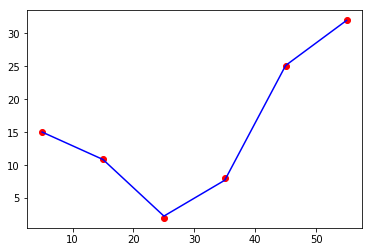

In [20]:
transformer = PolynomialFeatures(degree=4, include_bias=False)
transformer.fit(x)
x_ = transformer.transform(x)
print(x_)
model = LinearRegression().fit(x_, y)
r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)
y_pred = model.predict(x_)
print('predicted response:', y_pred, sep='\n')
plt.plot(x, y, 'ro')   
plt.plot(x, y_pred, color='b')
plt.show()